## Introduction

Medicare provider fraud occurs when healthcare providers intentionally deceive Medicare to obtain unlawful payments for services not rendered, services not medically necessary, or services that were misrepresented. This criminal activity undermines the integrity of the Medicare program and contributes to higher healthcare costs for everyone.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

Billing for services not rendered.

Duplicate submission of a claim for the same service.

Misrepresenting the service provided.

Charging for a more complex or expensive service than was actually provided.

Billing for services that were not provided to patients.

## Objective

The goal is to develop a machine learning model to detect potential fraudulent providers based on the claims filed by them.

## Dataset

For the purpose of this project, we are working with Inpatient claims, Outpatient claims and Beneficiary details of each provider:

A) Inpatient Data: This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

B) Outpatient Data: This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) Beneficiary Details Data: This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, classification_report, confusion_matrix
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter("ignore")

## Import Data

In [2]:
# Load Train Dataset

Train = pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")

# Load Test Dataset
Test = pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Outpatientdata-1542969243754.csv")

In [3]:
# Shape of data

print("The Training inpatient data has {} records and {} fields. \n" .format(Train_Inpatientdata.shape[0], Train_Inpatientdata.shape[1]))
print("The Training outpatient data has {} records and {} fields. \n" .format(Train_Outpatientdata.shape[0], Train_Outpatientdata.shape[1]))
print("The Training Benficiary data has {} records and {} fields. \n" .format(Train_Beneficiarydata.shape[0], Train_Beneficiarydata.shape[1]))

print("The Test inpatient data has {} records and {} fields. \n" .format(Test_Inpatientdata.shape[0], Test_Inpatientdata.shape[1]))
print("The Test outpatient data has {} records and {} fields. \n" .format(Test_Outpatientdata.shape[0], Test_Outpatientdata.shape[1]))
print("The Test Benficiary data has {} records and {} fields. \n" .format(Test_Beneficiarydata.shape[0], Test_Beneficiarydata.shape[1]))

The Training inpatient data has 40474 records and 30 fields. 

The Training outpatient data has 517737 records and 27 fields. 

The Training Benficiary data has 138556 records and 25 fields. 

The Test inpatient data has 9551 records and 30 fields. 

The Test outpatient data has 125841 records and 27 fields. 

The Test Benficiary data has 63968 records and 25 fields. 



## Exploratory Data Analysis

## Beneficiary Data Understanding

In [4]:
Train_Beneficiarydata.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [5]:
print("The Beneficiary Train Data has {} records and {} fields. \n" .format(Train_Beneficiarydata.shape[0], Train_Beneficiarydata.shape[1]))
print("The Beneficiary Test Data has {} records and {} fields. \n" .format(Test_Beneficiarydata.shape[0], Test_Beneficiarydata.shape[1]))

The Beneficiary Train Data has 138556 records and 25 fields. 

The Beneficiary Test Data has 63968 records and 25 fields. 



In [6]:
#Lets check missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [7]:
# Check for duplicates

print('There are '+ str(Train_Beneficiarydata.duplicated().sum())+ ' duplicate  in the beneficiary training dataset.')
print('There are '+ str(Test_Beneficiarydata.duplicated().sum())+ ' duplicate in the beneficiary test dataset.')

There are 0 duplicate  in the beneficiary training dataset.
There are 0 duplicate in the beneficiary test dataset.


In [8]:
# Number of unique benificaries

print('They are', Train_Beneficiarydata['BeneID'].nunique(), 'unique beneficiaries in the training data set')
print('They are', Test_Beneficiarydata['BeneID'].nunique(), 'unique beneficiaries in the test data set')

They are 138556 unique beneficiaries in the training data set
They are 63968 unique beneficiaries in the test data set


In [9]:
# Convert 'DOB' and 'DOD' to datetime format
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'], format='%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'], format='%Y-%m-%d', errors='ignore')
Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'], format='%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'], format='%Y-%m-%d', errors='ignore')

# Calculate age in years and round to the nearest integer
Train_Beneficiarydata['Age'] = round((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days / 365)
Test_Beneficiarydata['Age'] = round((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days / 365)

In [10]:
# The final DOD date is '2009-12-01' . We can use that to calculate the ages of those with no DOD

# Convert 'DOB' to datetime format
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'], format='%Y-%m-%d')
Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'], format='%Y-%m-%d')

# Calculate age for beneficiaries with missing 'Age' values, assuming 2009-12-01 as the reference date
Train_Beneficiarydata['Age'].fillna(
    round((pd.to_datetime('2009-12-01') - Train_Beneficiarydata['DOB']).dt.days / 365),
    inplace=True
)
Test_Beneficiarydata['Age'].fillna(
    round((pd.to_datetime('2009-12-01') - Test_Beneficiarydata['DOB']).dt.days / 365),
    inplace=True
)

In [11]:
# Create a new 'AliveorDead' column and flag deceased beneficiaries
Train_Beneficiarydata['AliveorDead'] = Train_Beneficiarydata['DOD'].notna().astype(int)
Test_Beneficiarydata['AliveorDead'] = Test_Beneficiarydata['DOD'].notna().astype(int)

In [12]:
Train_Beneficiarydata.groupby(['AliveorDead'])['BeneID'].nunique()

AliveorDead
0    137135
1      1421
Name: BeneID, dtype: int64

## Understanding of Inpatient Data

In [13]:
Train_Inpatientdata.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [14]:
#Lets check missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [15]:
# Calculate number of days patient was admitted from AdmissionDt and DischargeDt

# Convert 'AdmissionDt' and 'DischargeDt' to datetime format
Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'], format='%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'], format='%Y-%m-%d')
Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'], format='%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'], format='%Y-%m-%d')

# Calculate the number of days of admission, adding 1 to include both the admission and discharge days
Train_Inpatientdata['NumberofDaysAdmitted'] = (Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days + 1
Test_Inpatientdata['NumberofDaysAdmitted'] = (Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days + 1



# Convert 'ClaimStartDt' and 'ClaimEndDt' to datetime format
Train_Inpatientdata['ClaimEndDt'] = pd.to_datetime(Train_Inpatientdata['ClaimEndDt'], format='%Y-%m-%d')
Train_Inpatientdata['ClaimStartDt'] = pd.to_datetime(Train_Inpatientdata['ClaimStartDt'], format='%Y-%m-%d')

Test_Inpatientdata['ClaimEndDt'] = pd.to_datetime(Test_Inpatientdata['ClaimEndDt'], format='%Y-%m-%d')
Test_Inpatientdata['ClaimStartDt'] = pd.to_datetime(Test_Inpatientdata['ClaimStartDt'], format='%Y-%m-%d')

# Duration of Claim
Train_Inpatientdata['DurationofClaim'] = (Train_Inpatientdata['ClaimEndDt'] - Train_Inpatientdata['ClaimStartDt']).dt.days
Test_Inpatientdata['DurationofClaim'] = (Test_Inpatientdata['ClaimEndDt'] - Test_Inpatientdata['ClaimStartDt']).dt.days

In [16]:
# Add column admitted

Train_Inpatientdata['Admitted'] =1
Test_Inpatientdata['Admitted'] =1

In [17]:
# Distribution of beneficiaries based on Gender
px.histogram(Train_Inpatientdata, x = 'NumberofDaysAdmitted', title='NumberofDaysAdmitted')

In [18]:
# Distribution of beneficiaries based on Gender
px.box(Train_Inpatientdata, x = 'NumberofDaysAdmitted')

In [19]:
# Distribution of beneficiaries based on Gender
px.histogram(Train_Inpatientdata, x = 'DurationofClaim', title='DurationofClaim')

In [20]:
px.histogram(Train_Inpatientdata, x='InscClaimAmtReimbursed', title='InscClaimAmtReimbursed')

## Outpatient Data understanding

In [21]:
Train_Outpatientdata.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                 56409  
1                  0                 79380  
2                  0                   NaN  
3                  0                   NaN  
4                  0                 71947

In [22]:
# Check for duplicate rows 
print('Duplicate rows in train set', Train_Outpatientdata.duplicated().sum())
print('Duplicate rows in test set', Test_Outpatientdata.duplicated().sum())

Duplicate rows in train set 0
Duplicate rows in test set 0


In [23]:
Train_Outpatientdata.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [24]:
# Add column admitted

Train_Outpatientdata['Admitted'] = 0
Test_Outpatientdata['Admitted'] = 0

In [25]:
# Convert 'ClaimStartDt' and 'ClaimEndDt' to datetime format
Train_Outpatientdata['ClaimEndDt'] = pd.to_datetime(Train_Outpatientdata['ClaimEndDt'], format='%Y-%m-%d')
Train_Outpatientdata['ClaimStartDt'] = pd.to_datetime(Train_Outpatientdata['ClaimStartDt'], format='%Y-%m-%d')

Test_Outpatientdata['ClaimEndDt'] = pd.to_datetime(Test_Outpatientdata['ClaimEndDt'], format='%Y-%m-%d')
Test_Outpatientdata['ClaimStartDt'] = pd.to_datetime(Test_Outpatientdata['ClaimStartDt'], format='%Y-%m-%d')

# Duration of Claim
Train_Outpatientdata['DurationofClaim'] = (Train_Outpatientdata['ClaimEndDt'] - Train_Outpatientdata['ClaimStartDt']).dt.days
Test_Outpatientdata['DurationofClaim'] = (Test_Outpatientdata['ClaimEndDt'] - Test_Outpatientdata['ClaimStartDt']).dt.days

## Data Merging

In [26]:
#Identify common columns between Outpatient and inpatient data

common_cols = list(set(Train_Inpatientdata.columns).intersection(set(Train_Outpatientdata.columns)))
print(common_cols)

['ClmProcedureCode_1', 'ClmDiagnosisCode_2', 'ClaimID', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_7', 'ClmProcedureCode_5', 'ClmDiagnosisCode_3', 'ClmProcedureCode_6', 'Admitted', 'AttendingPhysician', 'ClmDiagnosisCode_1', 'OperatingPhysician', 'ClmProcedureCode_2', 'ClmProcedureCode_4', 'OtherPhysician', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_5', 'DurationofClaim', 'Provider', 'ClaimStartDt', 'DeductibleAmtPaid', 'ClmProcedureCode_3', 'ClmDiagnosisCode_8', 'BeneID', 'ClmDiagnosisCode_10', 'InscClaimAmtReimbursed', 'ClaimEndDt']


## Merge the outpatient and inpatient dataset

In [27]:
# Merge the DataFrames on the common columns, using an outer join

Train_Allpatientdata = pd.merge(Train_Outpatientdata, Train_Inpatientdata, on=common_cols, how='outer')
Test_Allpatientdata = pd.merge(Test_Outpatientdata, Test_Inpatientdata, on=common_cols, how='outer')

print(Train_Allpatientdata.shape)
print(Test_Allpatientdata.shape)

(558211, 33)
(135392, 33)


## Merge patient dataset with beneficiary dataset

In [28]:
df_train = Train_Allpatientdata.merge(Train_Beneficiarydata, on='BeneID', how='inner')

df_test = Test_Allpatientdata.merge(Test_Beneficiarydata, on='BeneID', how='inner')

In [29]:
# shape of dataset
print('Training data shape: ', df_train.shape)
print('Test data shape: ', df_test.shape)

Training data shape:  (558211, 59)
Test data shape:  (135392, 59)


In [30]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

df_train1 = pd.merge(Train, df_train,on='Provider')

df_test1 = pd.merge(Test, df_test,on='Provider')

In [31]:
# this value indicates whether the beneficiary has renal disease
df_train1['RenalDiseaseIndicator'].replace('Y','1',inplace=True)
df_train1['RenalDiseaseIndicator'] = df_train1['RenalDiseaseIndicator'].astype(int)
    
    
df_test1['RenalDiseaseIndicator'].replace('Y','1',inplace=True)
df_test1['RenalDiseaseIndicator'] = df_test1['RenalDiseaseIndicator'].astype(int)


# Drop DOD and DOB

df_train1.drop(columns=['DOB', 'DOD'], axis=1, inplace=True)
df_test1.drop(columns=['DOB', 'DOD'], axis=1, inplace=True)

In [32]:

# ClaimDiagnoseIndex, ClmProcedureIndex, ChronicCondIndex

df_train1['ClmDiagnosisCodeIndex'] = df_train1.filter(regex='ClmDiagnosisCode_').notnull().sum(axis=1)
df_test1['ClmDiagnosisCodeIndex'] = df_test1.filter(regex='ClmDiagnosisCode_').notnull().sum(axis=1)

df_train1['ClmProcedureCodeIndex'] = df_train1.filter(regex='ClmProcedureCode_').notnull().sum(axis=1)
df_test1['ClmProcedureCodeIndex'] = df_test1.filter(regex='ClmProcedureCode_').notnull().sum(axis=1)

In [33]:
# drop all features starting 

columns_to_drop = df_train1.filter(regex='ClmProcedureCode_|ClmDiagnosisCode_').columns
df_train1 = df_train1.drop(columns_to_drop, axis=1)
df_test1 = df_test1.drop(columns_to_drop, axis=1)

In [34]:
# fill nan for NumberofDaysAdmitted with 0

df_train1['NumberofDaysAdmitted'] = df_train1['NumberofDaysAdmitted'].fillna(0)
df_test1['NumberofDaysAdmitted'] = df_test1['NumberofDaysAdmitted'].fillna(0)

In [35]:
df_train1 = df_train1.dropna(subset=['AttendingPhysician'])
df_test1 = df_test1.dropna(subset=['AttendingPhysician'])

# Fill missing values with mean

df_train1['DeductibleAmtPaid'] = df_train1['DeductibleAmtPaid'].fillna(df_train1['DeductibleAmtPaid'].mean())
df_test1['DeductibleAmtPaid'] = df_test1['DeductibleAmtPaid'].fillna(df_test1['DeductibleAmtPaid'].mean())

In [36]:
# . Average features grouped by Provider

columns_to_transform = ["InscClaimAmtReimbursed", "DeductibleAmtPaid", "IPAnnualReimbursementAmt", "IPAnnualDeductibleAmt",
    "OPAnnualReimbursementAmt", "OPAnnualDeductibleAmt", "Age", "NoOfMonths_PartACov", "NoOfMonths_PartBCov","DurationofClaim",
                        "NumberofDaysAdmitted"
]

for column in columns_to_transform:
    df_train1[f"PerProviderAvg_{column}"] = df_train1.groupby('Provider')[column].transform('mean')
    df_test1[f"PerProviderAvg_{column}"] = df_test1.groupby('Provider')[column].transform('mean')
    
    

In [37]:
# Average features grouped by BeneID
# Average features grouped by Operating Physician


columns_to_transform = [
    "InscClaimAmtReimbursed",
    "DeductibleAmtPaid",
    "IPAnnualReimbursementAmt",
    "IPAnnualDeductibleAmt",
    "OPAnnualReimbursementAmt",
    "OPAnnualDeductibleAmt", 
    "DurationofClaim",
    "NumberofDaysAdmitted"
    
]


for column in columns_to_transform:
  
    
    df_train1[f"PerBeneIDAvg_{column}"] = df_train1.groupby('BeneID')[column].transform('mean')
    df_test1[f"PerBeneIDAvg_{column}"] = df_test1.groupby('BeneID')[column].transform('mean')
    
    df_train1[f"PerAttendingPhysician Avg_{column}"] = df_train1.groupby('AttendingPhysician')[column].transform('mean')
    df_test1[f"PerAttendingPhysician Avg_{column}"] = df_test1.groupby('AttendingPhysician')[column].transform('mean')

In [38]:
# Drop features not needed for model training
df_train1.drop(columns=['ClmAdmitDiagnosisCode', 'Provider', 'State', 'Race', 'Gender', 'County', 'AdmissionDt', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician',  
                        'DischargeDt', 'ClaimID', 'ClaimEndDt', 'DiagnosisGroupCode', 'ClaimStartDt', 'BeneID', 'ClaimID'], axis=1, inplace=True)

df_test1.drop(columns=['ClmAdmitDiagnosisCode', 'State', 'Race', 'County', 'Gender', 'AdmissionDt', 'DiagnosisGroupCode', 'OperatingPhysician', 'DischargeDt', 'AttendingPhysician', 'OtherPhysician', 
                       'ClaimID', 'ClaimEndDt', 'ClaimStartDt', 'ClaimID'], axis=1, inplace=True)

In [39]:
# histogram of Fraud_reported

px.histogram(df_train1, x="PotentialFraud",color='PotentialFraud',title="PotentialFraud", height=500, width=700)

In [40]:
# histogram of Admitted

px.histogram(df_train1, x="Admitted",color='PotentialFraud',title="Admitted", height=500, width=700)

In [41]:
# histogram of Fraud_reported

px.histogram(df_train1, x="RenalDiseaseIndicator",color='PotentialFraud',title="RenalDiseaseIndicator", height=500, width=700)

In [42]:
#ClmProcedureCodeIndex

px.histogram(df_train1, x="ClmProcedureCodeIndex",color='PotentialFraud',title="ChronicDiseaseIndex", height=500, width=700)

In [43]:
#ClmDiagnosisCodeIndex

px.histogram(df_train1, x="ClmDiagnosisCodeIndex",color='PotentialFraud',title="ChronicDiseaseIndex", height=500, width=700)

In [44]:
# convert target to numerical values (0, 1)

df_train1['PotentialFraud'].replace({'No':0, 'Yes': 1}, inplace=True)

## Data Preprocessing

In [45]:
# Split data into train and validation set

df_train2 , df_val = train_test_split(df_train1, test_size=0.10, random_state=42)

y_train = df_train2.pop('PotentialFraud')
X_train = df_train2

y_val = df_val.pop('PotentialFraud')
X_val = df_val

X_test = df_test1


print(X_train.shape, X_val.shape, X_test.shape)

(501032, 54) (55671, 54) (135045, 56)


In [46]:
# One hot encode ChronicCond_ features

categorical_cols = [col for col in X_train.columns if col.startswith('ChronicCond_')]

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data_train = encoder.fit_transform(X_train[categorical_cols])
encoded_data_test = encoder.fit_transform(X_test[categorical_cols])
encoded_data_val = encoder.fit_transform(X_val[categorical_cols])


encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out())
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out())
encoded_df_val = pd.DataFrame(encoded_data_val, columns=encoder.get_feature_names_out())

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)



X_train = pd.concat([X_train.drop(categorical_cols, axis=1), encoded_df_train], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), encoded_df_test], axis=1)
X_val = pd.concat([X_val.drop(categorical_cols, axis=1), encoded_df_val], axis=1)

In [47]:
# Treating imbalance data in training dataset

from imblearn.over_sampling import SMOTE

from collections import Counter

counter = Counter(y_train)

print('before smoting: ', counter)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After smoting: ', counter)

before smoting:  Counter({0: 310111, 1: 190921})
After smoting:  Counter({1: 310111, 0: 310111})


In [48]:
X_train.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  Admitted  DurationofClaim  \
0                     100                0.0         0                0   
1                      40                0.0         0                0   
2                     500                0.0         0                0   
3                      10                0.0         0                0   
4                      60                0.0         0                0   

   NumberofDaysAdmitted  RenalDiseaseIndicator  NoOfMonths_PartACov  \
0                   0.0                      0                   12   
1                   0.0                      0                   12   
2                   0.0                      0                   12   
3                   0.0                      0                   12   
4                   0.0                      0                   12   

   NoOfMonths_PartBCov  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   12                         0                      0   
1                   12                         0                      0   
2                   12                         0                      0   
3                   12                         0                      0   
4                   12                      5000                   1068   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt   Age  AliveorDead  \
0                       630                    270  82.0            0   
1                       670                    550  49.0            0   
2                      1120                   1640  85.0            0   
3                      1140                    180  65.0            0   
4                      4870                    210  89.0            0   

   ClmDiagnosisCodeIndex  ClmProcedureCodeIndex  \
0                      0                      0   
1                      1                      0   
2                      4                      0   
3                      2                      0   
4                      1                      0   

   PerProviderAvg_InscClaimAmtReimbursed  PerProviderAvg_DeductibleAmtPaid  \
0                             370.578616                         19.376638   
1                            1121.590190                         89.961119   
2                            2761.339713                        288.595347   
3                             392.819549                         21.879699   
4                             354.927536                         22.183575   

   PerProviderAvg_IPAnnualReimbursementAmt  \
0                              4437.509434   
1                              5009.280063   
2                              5953.971292   
3                              4817.857143   
4                              3167.729469   

   PerProviderAvg_IPAnnualDeductibleAmt  \
0                            576.311950   
1                            501.743671   
2                            767.387560   
3                            595.548872   
4                            340.521739   

   PerProviderAvg_OPAnnualReimbursementAmt  \
0                              2071.433962   
1                              2116.946203   
2                              1834.593301   
3                              2252.368421   
4                              1706.425121   

   PerProviderAvg_OPAnnualDeductibleAmt  PerProviderAvg_Age  \
0                            617.283019           72.523270   
1                            649.881329           73.796677   
2                            552.488038           73.789474   
3                            686.390977           74.176692   
4                            635.314010           73.758454   

   PerProviderAvg_NoOfMonths_PartACov  PerProviderAvg_NoOfMonths_PartBCov  \
0                           11.969811                           11.879245   
1                           12.000000                           11.973892   
2                           12.00000

## Model Building

Outliers can be handled through imputation, dropping the records or using ensemble models like Random Forest or Gradient Boosting

## Random Forest

In [49]:

RF= RandomForestClassifier(n_estimators=100, random_state=0, max_depth=15)


# Fitting model to train set

RF.fit( X_train, y_train) 


RandomForestClassifier(max_depth=15, random_state=0)

In [50]:
# Checking for overfitting and underfitting

print(" Accuracy on training set: ",  RF.score( X_train, y_train)) 

print(" Accuracy on test set: ", RF.score( X_val, y_val))

 Accuracy on training set:  0.9912208854248963
 Accuracy on test set:  0.987390203157838


In [51]:
# Checking for overfitting and underfitting

print(" Accuracy on training set: ",  RF.score( X_train, y_train)) 

print(" Accuracy on test set: ", RF.score( X_val, y_val))

 Accuracy on training set:  0.9912208854248963
 Accuracy on test set:  0.987390203157838


In [52]:
# Prediction on test set

y_pred = RF.predict(X_val)

In [53]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

rec = recall_score(y_val, y_pred)
pre = precision_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
f1_sc =  f1_score(y_val, y_pred)

print("Accuracy :: ",acc)
print("Precision :: ",pre)
print("Recall :: ", rec)
print("f1_score", f1_sc)

Accuracy ::  0.987390203157838
Precision ::  0.969603062480062
Recall ::  0.9983576556707804
f1_score 0.9837702871410736


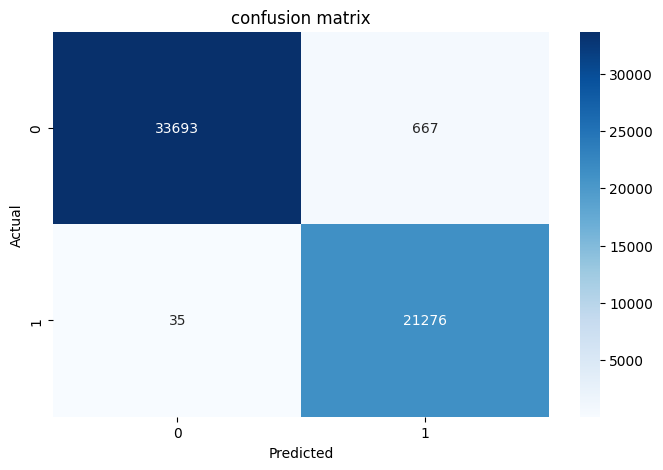

In [54]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred)

# Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(cm, cmap= 'Blues', linecolor='black', fmt='', annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc:  0.999840653269019


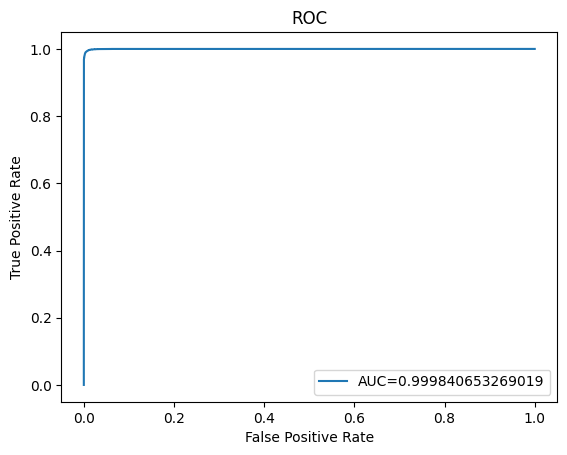

In [55]:
# ROC Curve, AUC

from sklearn import metrics

y_pred_proba = RF.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
print('auc: ', auc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [56]:
# calssification report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34360
           1       0.97      1.00      0.98     21311

    accuracy                           0.99     55671
   macro avg       0.98      0.99      0.99     55671
weighted avg       0.99      0.99      0.99     55671



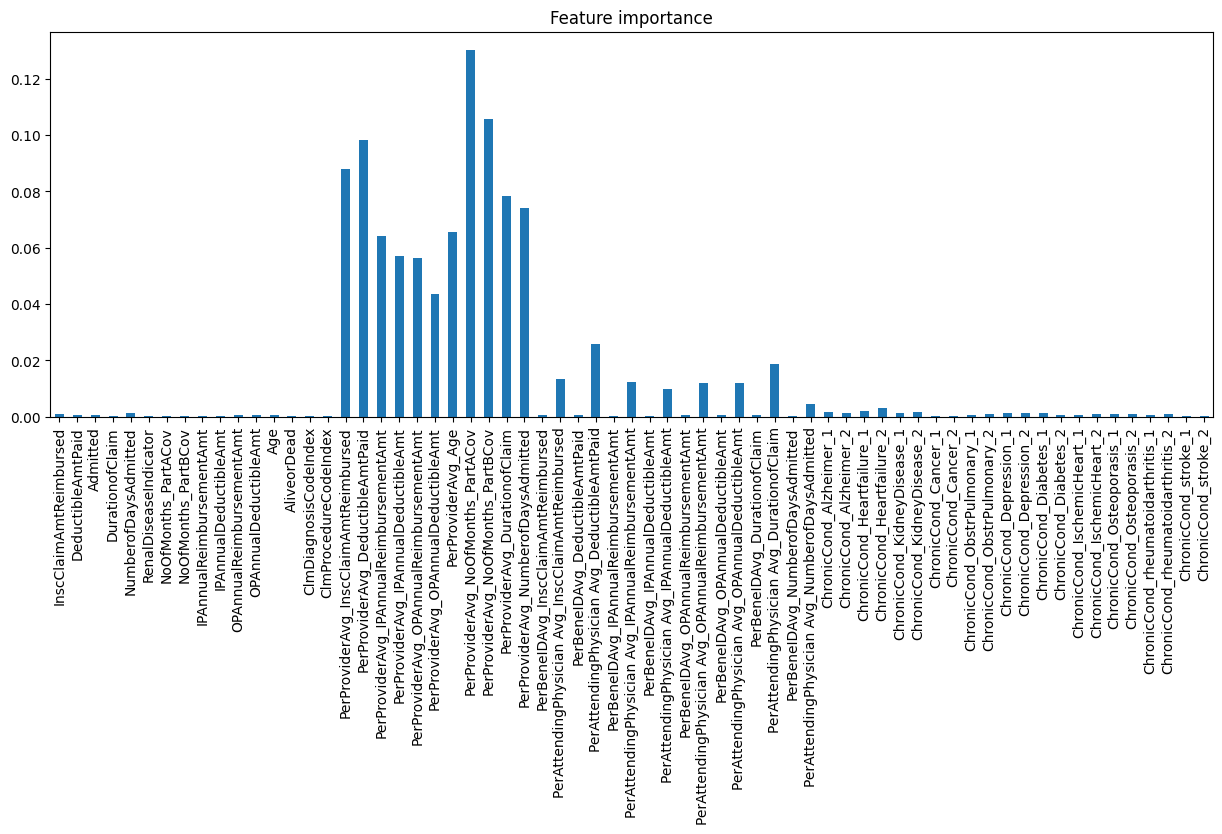

In [57]:
# visualizing the most important features

plt.figure(figsize=(15, 5))
importances = RF.feature_importances_
feature_importance = pd.Series(importances, index = X_train.columns)
feature_importance.plot(kind='bar')
plt.title('Feature importance')
plt.show()